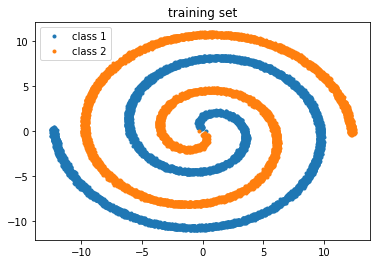

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Create training dataset


def spirals(n_points, noise=.5):
    n = np.sqrt(np.random.rand(n_points, 1)) * 720 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points, 1) * noise
    return (np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
            np.hstack((np.zeros(n_points), np.ones(n_points))))


X = np.array(spirals(10000)[0])
Y = np.array(spirals(10000)[1])

spiral_1_x = (X[:10000, 0], X[:10000, 1])
spiral_1_y = (Y[:10000])
spiral_2_x = (X[10000:, 0], X[10000:, 1])
spiral_2_y = (Y[10000:])

#plot training dataset
plt.title('training set')
plt.plot(spiral_1_x[0], spiral_1_x[1], '.', label='class 1')
plt.plot(spiral_2_x[0], spiral_2_x[1], '.', label='class 2')
plt.legend()
plt.show()


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Create train, test dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

#Scale data for  classifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Create classifier
knn = KNeighborsClassifier()

#Find best parameters
param_grid = {'n_neighbors': np.arange(1, 25),
              'metric': ['euclidean', 'manhattan', ]
              }
knn_gscv = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
knn_gscv.fit(X_train, y_train)
knn_gscv.best_score_
knn_gscv.best_params_
knn_gscv.best_index_
knn_gscv.best_estimator_


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

Train score 1.0
Test score 1.0


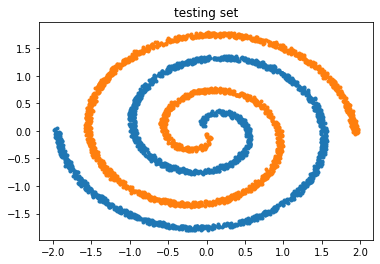

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Create classifier with best parameters
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)

#Create 2 groups for plotting
spiral_1 = np.array([])
spiral_2 = np.array([])

for i in range(len(predicted)):
    if predicted[i] == 0:
        spiral_1 = np.append(spiral_1, X_test[i])
    else:
        spiral_2 = np.append(spiral_2, X_test[i])

spiral_1 = np.reshape(spiral_1, (-1, 2))
spiral_2 = np.reshape(spiral_2, (-1, 2))
plt.title('testing set')
plt.plot(spiral_1[:, np.array([0])],
         spiral_1[:, np.array([1])], '.', label='class 3')
plt.plot(spiral_2[:, np.array([0])],
         spiral_2[:, np.array([1])], '.', label='class 4')

#Final accuracy
print(f'Train score {knn.score(X_train, y_train)}')
print(f'Test score {knn.score(X_test, y_test)}')
